# Exploring image data

* Min values $> 0$ in both modalities $\Rightarrow$ `voxelArrayShift`$=0$.
* Detecting outliers?

In [1]:
import sys
sys.path.append('../src')

import nrrd
import ioutil

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
np.set_printoptions(precision=2)

In [3]:
ct_paths = ioutil.relative_paths(
    './../../data/images/stacks_ct/prep_ct',
    target_format='nrrd'
)
pet_paths = ioutil.relative_paths(
    './../../data/images/stacks_pet/prep_pet',
    target_format='nrrd'
)
masks_paths = ioutil.relative_paths(
    './../../data/images/masks/prep_masks/',
    target_format='nrrd'
)

In [4]:
def cropped_image_info(path_images, path_masks):
    
    image_data, metadata, num = [], [], []
    for image_path, mask_path in zip(path_images, path_masks):
        raw_image_data, header = nrrd.read(image_path)
        mask, _ = nrrd.read(mask_path)
        data = raw_image_data * mask

        header['min'] = np.min(data)
        header['max'] = np.max(data)
        header['range'] = np.unique(data).size

        num.append(ioutil.sample_num(image_path))
        image_data.append(data), metadata.append(header)
        
    return dict(zip(*(num, image_data))), pd.DataFrame(metadata, index=num)

## External CT Statistics

In [6]:
ct_data, ct_mdata = cropped_image_info(ct_paths, masks_paths)
ct_mdata.head()

,type,dimension,sizes,endian,encoding,min,max,range
2,double,3,"[82, 83, 68]",little,gzip,0.000000,4094.937514,36727
4,double,3,"[69, 64, 74]",little,gzip,0.000000,4094.937514,36599
5,double,3,"[73, 70, 82]",little,gzip,0.000000,4094.937514,36256
8,double,3,"[81, 106, 114]",little,gzip,0.000000,3863.927901,36840
10,double,3,"[72, 72, 72]",little,gzip,1.562142,4094.937514,36101


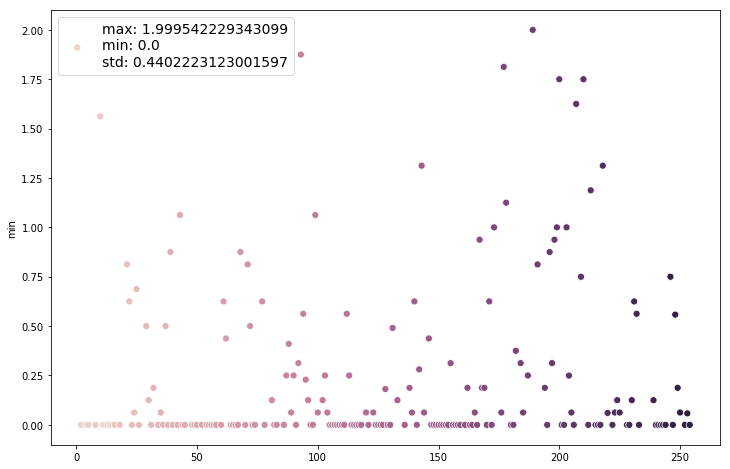

In [7]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=ct_mdata.index, y='min', data=ct_mdata, hue=ct_mdata.index, s=50
);
plt.legend(
    [
            'max: {}\nmin: {}\nstd: {}'.format(
                np.max(ct_mdata['min']),
                np.min(ct_mdata['min']),
                np.std(ct_mdata['min'])
            )
    ], loc='best', fontsize=14
);

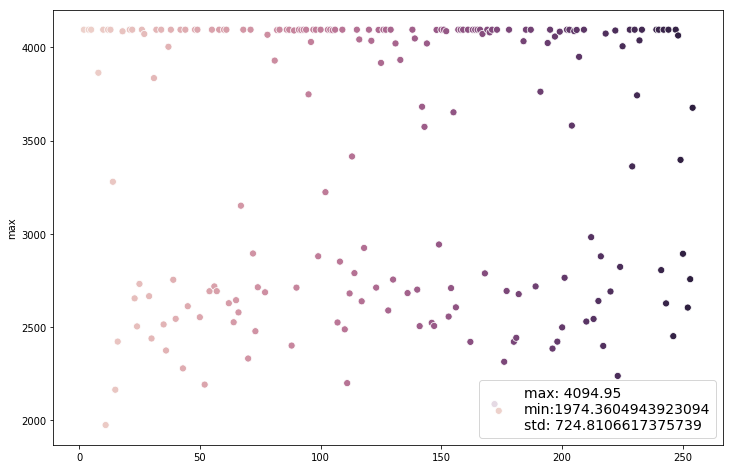

In [8]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=ct_mdata.index, y='max', data=ct_mdata, hue=ct_mdata.index, s=50
);
plt.legend(
    [
            'max: {}\nmin:{}\nstd: {}'.format(
                np.max(ct_mdata['max']), 
                np.min(ct_mdata['max']),
                np.std(ct_mdata['max'])
            )
    ], loc='best', fontsize=14
);

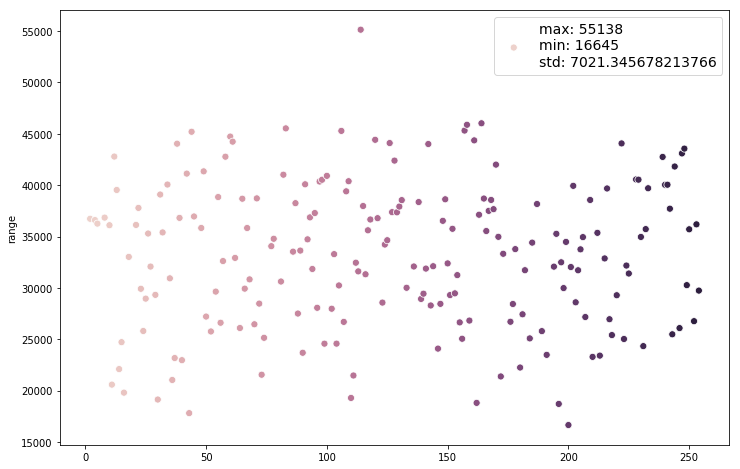

In [9]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=ct_mdata.index, y='range', data=ct_mdata, hue=ct_mdata.index, s=50
);
plt.legend(
    [
        'max: {}\nmin: {}\nstd: {}'.format(
            np.max(ct_mdata.range), 
            np.min(ct_mdata.range),
            np.std(ct_mdata.range)
        )
    ], loc='best', fontsize=14
);

### Fixed bin width

In [10]:
print(ct_mdata.mean(axis=0))
print()
print(ct_mdata.std(axis=0))

dimension        3.000000
min              0.251927
max           3441.468184
range        33260.338384
dtype: float64

dimension       0.000000
min             0.441338
max           726.647954
range        7039.143795
dtype: float64


Range: 3695.5931537598203


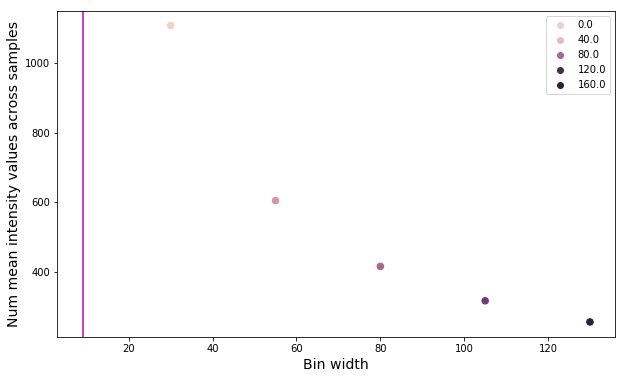

In [18]:
nbins = 9
bin_widths = np.linspace(30, 130, 5)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=bin_widths, y=ct_mdata.mean(axis=0).range / bin_widths, hue=bin_widths, 
    s=70
);
plt.xlabel('Bin width', fontsize=14), 
plt.ylabel('Num mean intensity values across samples', fontsize=14);
plt.axvline(x=nbins, c='m');
print('Range: {}'.format(ct_mdata.mean(axis=0).range / nbins))

## External PET Statistics

Compare statistics between patients.

In [12]:
pet_data, pet_mdata = cropped_image_info(pet_paths, masks_paths)
pet_mdata.head()

,type,dimension,sizes,endian,encoding,min,max,range
2,double,3,"[82, 83, 68]",little,gzip,0.006795,24.741200,28749
4,double,3,"[69, 64, 74]",little,gzip,0.012616,18.655424,26192
5,double,3,"[73, 70, 82]",little,gzip,0.000000,16.739500,31150
8,double,3,"[81, 106, 114]",little,gzip,0.002746,16.358900,43595
10,double,3,"[72, 72, 72]",little,gzip,0.006954,16.877442,25824


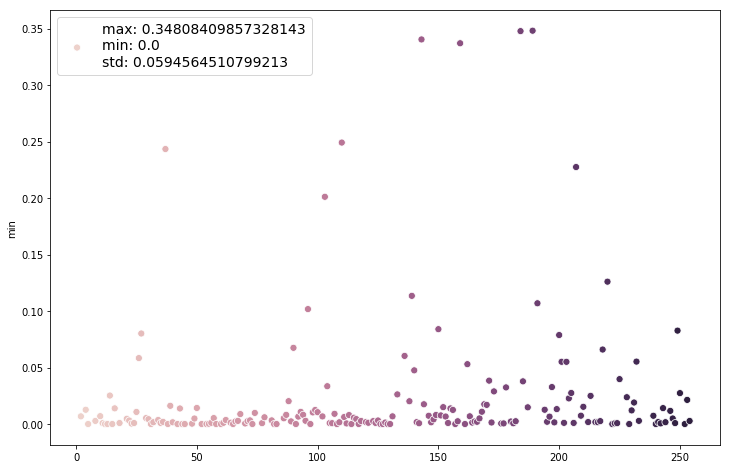

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=pet_mdata.index, y='min', data=pet_mdata, hue=pet_mdata.index, s=50
);
plt.legend(
    [
            'max: {}\nmin: {}\nstd: {}'.format(
                np.max(pet_mdata['min']), 
                np.min(pet_mdata['min']),
                np.std(pet_mdata['min'])
            )
    ], loc='best', fontsize=14
);

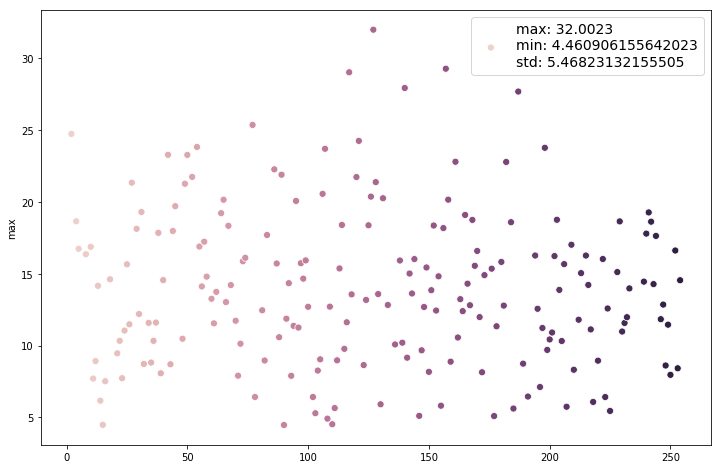

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=pet_mdata.index, y='max', data=pet_mdata, hue=pet_mdata.index, s=50
);
plt.legend(
    [
            'max: {}\nmin: {}\nstd: {}'.format(
                np.max(pet_mdata['max']), 
                np.min(pet_mdata['max']),
                np.std(pet_mdata['max'])
            )
    ], loc='best', fontsize=14
);

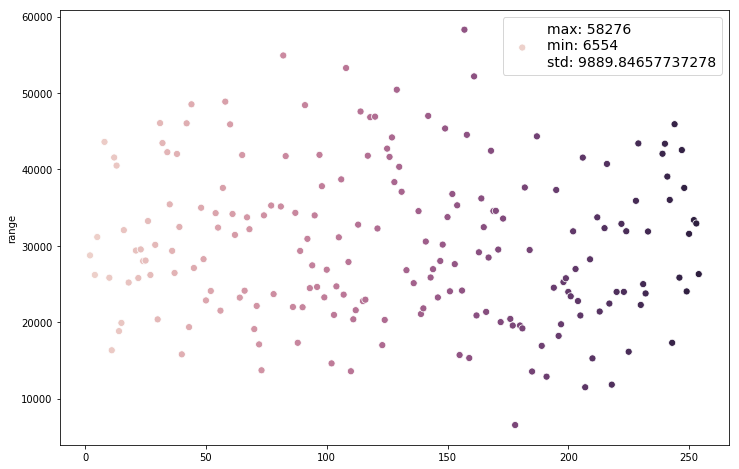

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=pet_mdata.index, y='range', data=pet_mdata, hue=pet_mdata.index, s=50
);
plt.legend(
    [
        'max: {}\nmin: {}\nstd: {}'.format(
            np.max(pet_mdata.range), 
            np.min(pet_mdata.range),
            np.std(pet_mdata.range)
        )
    ], loc='best', fontsize=14
);

### Fixed bin width

In [16]:
print(pet_mdata.mean(axis=0))
print()
print(pet_mdata.std(axis=0))

dimension        3.000000
min              0.023878
max             13.969958
range        30151.065657
dtype: float64

dimension       0.000000
min             0.059607
max             5.482093
range        9914.915937
dtype: float64


Range: 3350.118406285073


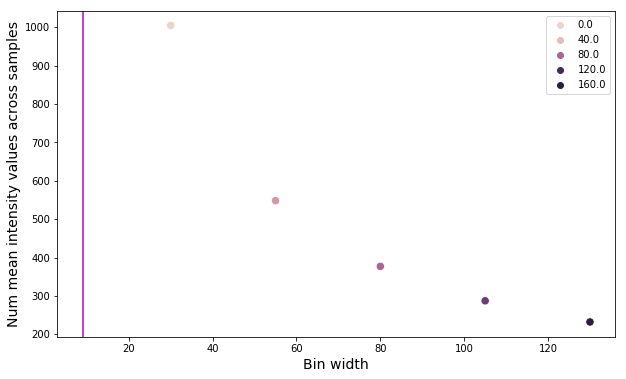

In [19]:
nbins = 9
bin_widths = np.linspace(30, 130, 5)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=bin_widths, y=pet_mdata.mean(axis=0).range / bin_widths, hue=bin_widths, 
    s=70
);
plt.xlabel('Bin width', fontsize=14), 
plt.ylabel('Num mean intensity values across samples', fontsize=14);
plt.axvline(x=nbins, c='m');
print('Range: {}'.format(pet_mdata.mean(axis=0).range / nbins))

## Internal CT statistics

Compare statistics within each patient. Potential to detect outliers?